To Do:

SVR
Gaussian Process
Polynomial Regression
NN
Random Forest for Regression

In [1]:
# Import Packages I will need
from lex_processing import * 
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# To show plots in notebook
%matplotlib inline  

from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('classic')

from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy import stats

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from collections import Counter

In [2]:
# Path is where the data I want to process is.
# For Mac
# pathReagan = '/Users/Joe/dropbox/Data/Edited Data/Presidents Data/ReaganSpeeches/'
# pathBush = '/Users/Joe/dropbox/Data/Edited Data/Presidents Data/BushSpeeches/'
# pathTrump = '/Users/Joe/dropbox/Data/Edited Data/Presidents Data/TrumpSpeeches/'
# For Linux
pathReagan = '/home/CAMPUS/alcantaj/Dropbox/Data/Edited Data/Presidents Data/ReaganSpeeches/'
pathBush = '/home/CAMPUS/alcantaj/Dropbox/Data/Edited Data/Presidents Data/BushSpeeches/'
pathTrump = '/home/CAMPUS/alcantaj/Dropbox/Data/Edited Data/Presidents Data/TrumpSpeeches/'

In [3]:
dfReagan = pd.DataFrame()
dfBush = pd.DataFrame()
dfTrump = pd.DataFrame()

In [4]:
for filename in os.listdir(pathReagan):
    if filename.endswith('txt'):
        f = open(pathReagan + filename)
        raw = f.read()
        # Clear raw of punctuation and tokenize for word counts.
        wordsNoPunct = strip_punctuation(raw)
        #hesitations = wordsNoPunct.count('—')
        wordsNoPunct.replace("—", ' ')
        wordsNoPunct = word_tokenize(wordsNoPunct)
        words = word_tokenize(raw)
        # Word Counts for certain words
        c = Counter(words)
        Fillers = c['well'] + c['so'] + c['basically'] + c['actually'] + c['literally'] + c['um'] + c['ah']
        NSNouns = c['something'] + c['anything'] + c['thing']
        LIVerbs = c['be'] + c['come'] + c['do'] + c['get'] + c['give'] + c['go'] + c['have'] + c['know'] + c['look']
        + c['make'] + c['see'] + c['tell'] + c['think'] + c['want']
        
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(wordsNoPunct)
        mls = meanLengthSentence(processed)
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'TTR': lex,
                    'WordCount':len(wordsNoPunct), 
                    'UniqueWords':len(set(wordsNoPunct)), 
                    'MLU': mls, 'Fillers': Fillers,
                   'NSNouns': NSNouns, 'LIVerbs': LIVerbs}
        finalDict = {**thetuple, **wordDict}
        dfReagan = dfReagan.append(finalDict, ignore_index = True)

In [5]:
for filename in os.listdir(pathBush):
    if filename.endswith('txt'):
        f = open(pathBush + filename)
        raw = f.read()
        # Clear raw of punctuation and tokenize for word counts.
        wordsNoPunct = strip_punctuation(raw)
        #hesitations = wordsNoPunct.count('-')
        wordsNoPunct.replace("-", ' ')
        wordsNoPunct = word_tokenize(wordsNoPunct)
        
        words = word_tokenize(raw)
        # Word Counts for certain words
        c = Counter(words)
        Fillers = c['well'] + c['so'] + c['basically'] + c['actually'] + c['literally'] + c['um'] + c['ah']
        NSNouns = c['something'] + c['anything'] + c['thing']
        LIVerbs = c['be'] + c['come'] + c['do'] + c['get'] + c['give'] + c['go'] + c['have'] + c['know'] + c['look']
        + c['make'] + c['see'] + c['tell'] + c['think'] + c['want']
        
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(wordsNoPunct)
        mls = meanLengthSentence(processed)
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'TTR': lex,
                    'WordCount':len(wordsNoPunct), 
                    'UniqueWords':len(set(wordsNoPunct)), 
                    'MLU': mls, 'Fillers': Fillers,
                   'NSNouns': NSNouns, 'LIVerbs': LIVerbs}
        finalDict = {**thetuple, **wordDict}
        dfBush = dfBush.append(finalDict, ignore_index = True)

In [6]:
for filename in os.listdir(pathTrump):
    if filename.endswith('txt'):
        f = open(pathTrump + filename)
        raw = f.read()
        # Clear raw of punctuation and tokenize for word counts.
        wordsNoPunct = strip_punctuation(raw)
        #hesitations = wordsNoPunct.count('-')
        wordsNoPunct.replace("-", ' ')
        wordsNoPunct = word_tokenize(wordsNoPunct)
        
        words = word_tokenize(raw)
        # Word Counts for certain words
        c = Counter(words)
        Fillers = c['well'] + c['so'] + c['basically'] + c['actually'] + c['literally'] + c['um'] + c['ah']
        NSNouns = c['something'] + c['anything'] + c['thing']
        LIVerbs = c['be'] + c['come'] + c['do'] + c['get'] + c['give'] + c['go'] + c['have'] + c['know'] + c['look']
        + c['make'] + c['see'] + c['tell'] + c['think'] + c['want']
        
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(wordsNoPunct)
        mls = meanLengthSentence(processed)
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'TTR': lex,
                    'WordCount':len(wordsNoPunct), 
                    'UniqueWords':len(set(wordsNoPunct)), 
                    'MLU': mls, 'Fillers': Fillers,
                   'NSNouns': NSNouns, 'LIVerbs': LIVerbs}
        finalDict = {**thetuple, **wordDict}
        dfTrump = dfTrump.append(finalDict, ignore_index = True)

In [7]:
# Rearranging Columns
inserted_cols = ['Filename', 'TTR','WordCount', 'UniqueWords', 'MLU', 'Fillers', 'NSNouns', 'LIVerbs']
cols = ([col for col in inserted_cols if col in dfReagan] 
        + [col for col in dfReagan if col not in inserted_cols])
dfReagan = dfReagan[cols]

In [8]:
# Rearranging Columns
inserted_cols = ['Filename', 'TTR','WordCount', 'UniqueWords', 'MLU', 'Fillers', 'NSNouns', 'LIVerbs']
cols = ([col for col in inserted_cols if col in dfBush] 
        + [col for col in dfBush if col not in inserted_cols])
dfBush = dfBush[cols]

In [9]:
# Rearranging Columns
inserted_cols = ['Filename', 'TTR','WordCount', 'UniqueWords', 'MLU', 'Fillers', 'NSNouns', 'LIVerbs']
cols = ([col for col in inserted_cols if col in dfTrump] 
        + [col for col in dfTrump if col not in inserted_cols])
dfTrump = dfTrump[cols]

In [10]:
# Fill NA's with 0s as in this dataset, NAN represent the feature NOT occuring in a particular document.
dfReagan = dfReagan.fillna(0)
dfBush = dfBush.fillna(0)
dfTrump = dfTrump.fillna(0)

In [11]:
dfReagan.to_csv('testReagan.csv')
dfBush.to_csv('testBush.csv')
dfTrump.to_csv('testTrump.csv')

In [12]:
testpath = '/home/CAMPUS/alcantaj/Documents/PhD/Jupyter Notebooks/'

In [13]:
a = pd.read_csv(testpath + "dates.csv")
b = pd.read_csv(testpath + "testReagan.csv")

c = pd.read_csv(testpath + "dates2.csv")
d = pd.read_csv(testpath + "testBush.csv")

e = pd.read_csv(testpath + "dates3.csv")
f = pd.read_csv(testpath + "testTrump.csv")

In [14]:
a['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in a['Date']]
c['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in c['Date']]
e['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in e['Date']]

In [15]:
a['Julian'] = [get_julian_datetime(x) for x in a['JDate']]
c['Julian'] = [get_julian_datetime(x) for x in c['JDate']]
e['Julian'] = [get_julian_datetime(x) for x in e['JDate']]

In [16]:
mergedRR = a.merge(b, on='Filename')
mergedGWHB = c.merge(d, on='Filename')
mergedDJT = e.merge(f, on='Filename')

In [17]:
mergedRR = mergedRR.sort_values(by=['JDate'])
mergedGWHB = mergedGWHB.sort_values(by=['JDate'])
mergedDJT = mergedDJT.sort_values(by=['JDate'])

In [18]:
# Create new labels (Index is in order of article date)
mergedRR = mergedRR.reset_index()
mergedRR['index'] = mergedRR.index
mergedGWHB = mergedGWHB.reset_index()
mergedGWHB['index'] = mergedGWHB.index
mergedDJT = mergedDJT.reset_index()
mergedDJT['index'] = mergedDJT.index

In [19]:
# Dropping Redundant Columns
mergedRR = mergedRR.drop(['Unnamed: 0'], axis=1)
mergedGWHB = mergedGWHB.drop(['Unnamed: 0'], axis=1)
mergedDJT = mergedDJT.drop(['Unnamed: 0'], axis=1)

In [20]:
# To avoid confusion, rename merged to df
dfRR = mergedRR
dfGWHB = mergedGWHB
dfDJT = mergedDJT

In [21]:
# Add Target Variable
yRR = dfRR['index']
yGWHB = dfGWHB['index']
yDJT = dfDJT['index']

#yRR = dfRR['Julian']
#yGWHB = dfGWHB['Julian']

In [22]:
# Calculate some new aggregate columns
dfRR['Nouns'] = dfRR['NN'] + dfRR['NNS']+ dfRR['NNP'] + dfRR['NNPS']
dfRR['Nouns/100'] = dfRR['Nouns'] / 100
dfRR['NounsNormalised'] = dfRR['Nouns'] / dfRR['WordCount']
dfRR['Adjectives'] = dfRR['JJ'] + dfRR['JJR'] + dfRR['JJS']
dfRR['Adjectives/100'] = dfRR['Adjectives'] / 100
dfRR['AdjectivesNormalised'] = dfRR['Adjectives'] / dfRR['WordCount']
dfRR['Adverbs'] = dfRR['RB'] + dfRR['RBR'] + dfRR['RBS']
dfRR['Adverbs/100'] = dfRR['Adverbs'] / 100
dfRR['AdverbsNormalised'] = dfRR['Adverbs'] / dfRR['WordCount']
dfRR['Verbs'] = dfRR['VB'] + dfRR['VBD'] + dfRR['VBG'] + dfRR['VBN'] + dfRR['VBP'] + dfRR['VBZ']
dfRR['Verbs/100'] = dfRR['Verbs'] / 100
dfRR['VerbsNormalised'] = dfRR['Verbs'] / dfRR['WordCount']

In [23]:
# Calculate some new aggregate columns
dfGWHB['Nouns'] = dfGWHB['NN'] + dfGWHB['NNS']+ dfGWHB['NNP'] + dfGWHB['NNPS']
dfGWHB['Nouns/100'] = dfGWHB['Nouns'] / 100
dfGWHB['NounsNormalised'] = dfGWHB['Nouns'] / dfGWHB['WordCount']
dfGWHB['Adjectives'] = dfGWHB['JJ'] + dfGWHB['JJR'] + dfGWHB['JJS']
dfGWHB['Adjectives/100'] = dfGWHB['Adjectives'] / 100
dfGWHB['AdjectivesNormalised'] = dfGWHB['Adjectives'] / dfGWHB['WordCount']
dfGWHB['Adverbs'] = dfGWHB['RB'] + dfGWHB['RBR'] + dfGWHB['RBS']
dfGWHB['Adverbs/100'] = dfGWHB['Adverbs'] / 100
dfGWHB['AdverbsNormalised'] = dfGWHB['Adverbs'] / dfGWHB['WordCount']
dfGWHB['Verbs'] = dfGWHB['VB'] + dfGWHB['VBD'] + dfGWHB['VBG'] + dfGWHB['VBN'] + dfGWHB['VBP'] + dfGWHB['VBZ']
dfGWHB['Verbs/100'] = dfGWHB['Verbs'] / 100
dfGWHB['VerbsNormalised'] = dfGWHB['Verbs'] / dfGWHB['WordCount']

In [24]:
# Calculate some new aggregate columns
dfDJT['Nouns'] = dfDJT['NN'] + dfDJT['NNS']+ dfDJT['NNP'] + dfDJT['NNPS']
dfDJT['Nouns/100'] = dfDJT['Nouns'] / 100
dfDJT['NounsNormalised'] = dfDJT['Nouns'] / dfDJT['WordCount']
dfDJT['Adjectives'] = dfDJT['JJ'] + dfDJT['JJR'] + dfDJT['JJS']
dfDJT['Adjectives/100'] = dfDJT['Adjectives'] / 100
dfDJT['AdjectivesNormalised'] = dfDJT['Adjectives'] / dfDJT['WordCount']
dfDJT['Adverbs'] = dfDJT['RB'] + dfDJT['RBR'] + dfDJT['RBS']
dfDJT['Adverbs/100'] = dfDJT['Adverbs'] / 100
dfDJT['AdverbsNormalised'] = dfDJT['Adverbs'] / dfDJT['WordCount']
dfDJT['Verbs'] = dfDJT['VB'] + dfDJT['VBD'] + dfDJT['VBG'] + dfDJT['VBN'] + dfDJT['VBP'] + dfDJT['VBZ']
dfDJT['Verbs/100'] = dfDJT['Verbs'] / 100
dfDJT['VerbsNormalised'] = dfDJT['Verbs'] / dfDJT['WordCount']

In [25]:
# Export dataset to csv files
dfRR.to_csv('Reagan.csv')
dfGWHB.to_csv('Bush.csv')
dfDJT.to_csv('Trump.csv')

T-Tests

In [26]:
t2, p2 = stats.ttest_ind(dfRR['UniqueWords'], dfGWHB['UniqueWords'])
print('T Value', t2)
print('P Value', '{0:.10f}'.format(p2))

T Value 6.75951316646184
P Value 0.0000000002


Pearson's Correlations

In [41]:
r,p = pearsonr([1, 2, 3, 4], [1, 5, 7, 9])
print('R Squared', r)
print('P Value', '{0:.9f}'.format(p))

R Squared 0.9827076298239908
P Value 0.017292370


In [27]:
r,p = pearsonr(dfRR['UniqueWords'], dfRR['index'])
print('R Squared', r)
print('P Value', '{0:.10f}'.format(p))

R Squared -0.5848886765334836
P Value 0.0000244993


In [28]:
r,p = pearsonr(dfRR['Nouns/100'], dfRR['index'])
print('R Squared', r)
print('P Value', '{0:.10f}'.format(p))

R Squared -0.5756687790278094
P Value 0.0000351506


In [29]:
r,p = pearsonr(dfGWHB['Nouns/100'], dfGWHB['index'])
print('R Squared', r)
print('P Value', '{0:.10f}'.format(p))

R Squared -0.21401649793578123
P Value 0.0137359285


In [30]:
r,p = pearsonr(dfRR['WordCount'], dfRR['index'])
print('R Squared', r)
print('P Value', '{0:.10f}'.format(p))

R Squared -0.3631553129039883
P Value 0.0142096204


In [31]:
r,p = pearsonr(dfGWHB['WordCount'], dfGWHB['index'])
print('R Squared', r)
print('P Value', '{0:.10f}'.format(p))

R Squared -0.2101381968678283
P Value 0.0155885598


In [42]:
r,p = pearsonr(dfGWHB['index'], (dfGWHB['TTR']))
print('R Squared', r)
print('P Value', '{0:.10f}'.format(p))

R Squared 0.19926210120038373
P Value 0.0219869231


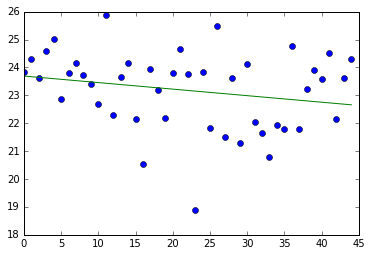

In [32]:
# Plot Mean Length of Utterance over time for RR
xs = dfRR['index']
ys = dfRR['MLU']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

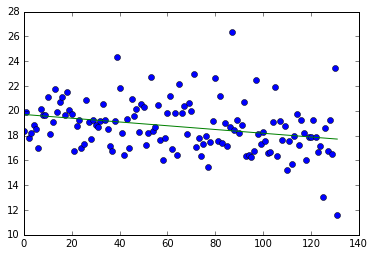

In [33]:
# Plot Mean Length of Utterance over time for GWHB
xs = dfGWHB['index']
ys = dfGWHB['MLU']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

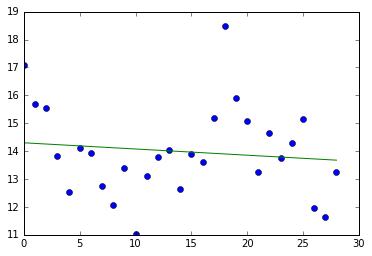

In [34]:
# Plot Mean Length of Utterance over time for DJT
xs = dfDJT['index']
ys = dfDJT['MLU']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

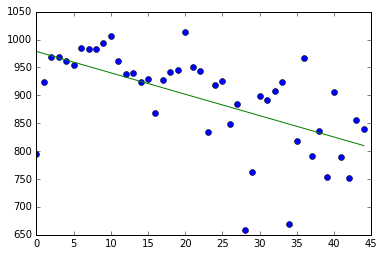

In [35]:
# Plot Unique Words over time for RR
xs = dfRR['index']
ys = dfRR['UniqueWords']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

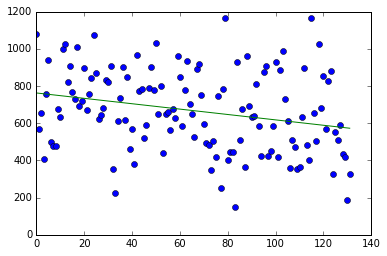

In [36]:
# Plot Unique Words over time for GWHB
xs = dfGWHB['index']
ys = dfGWHB['UniqueWords']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

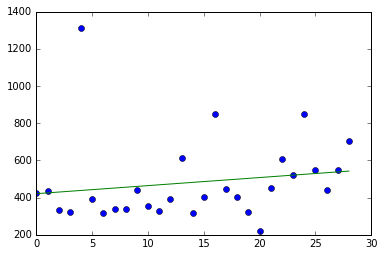

In [37]:
# Plot Unique Words over time for DJT
xs = dfDJT['index']
ys = dfDJT['UniqueWords']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

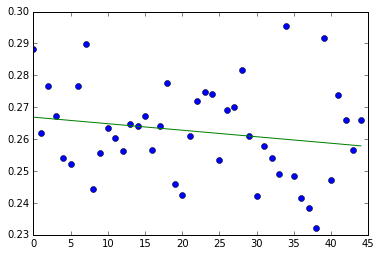

In [38]:
# Plot Token Type Ratio over time for RR
xs = dfRR['index']
ys = dfRR['TTR']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

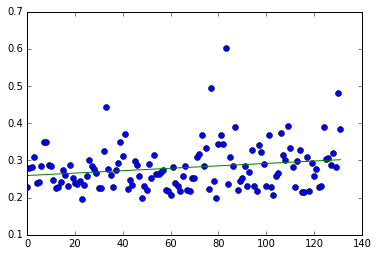

In [39]:
# Plot Token Type Ratio over time for GWHB
xs = dfGWHB['index']
ys = dfGWHB['TTR']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

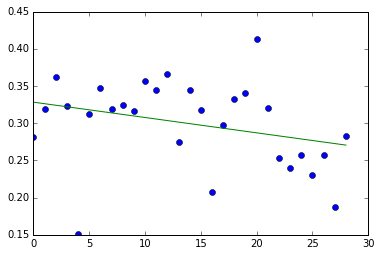

In [40]:
# Plot Token Type Ratio over time for DJT
xs = dfDJT['index']
ys = dfDJT['TTR']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

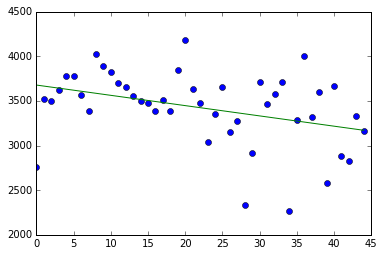

In [41]:
# Plot Word Count over time for RR
xs = dfRR['index']
ys = dfRR['WordCount']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

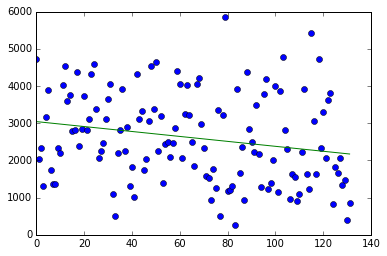

In [42]:
# Plot Word Count over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['WordCount']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

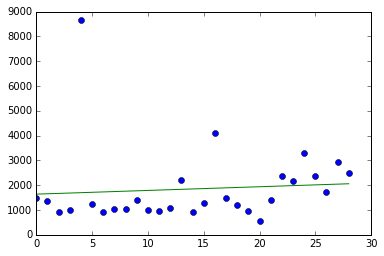

In [43]:
# Plot Word Count over time for DJT
xs = dfDJT['index']
ys = dfDJT['WordCount']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1)
plt.plot(xs, ys, 'o')
plt.plot(xs, trend[1] + trend[0] * xs)

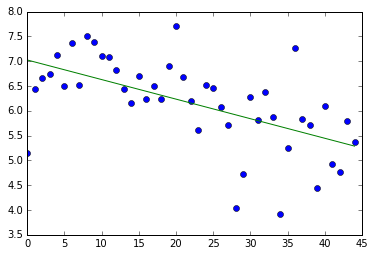

In [44]:
# Plot Nouns per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Nouns/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

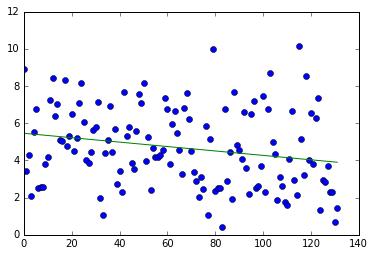

In [45]:
# Plot Nouns per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Nouns/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

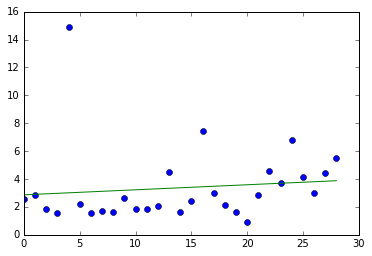

In [46]:
# Plot Nouns per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Nouns/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

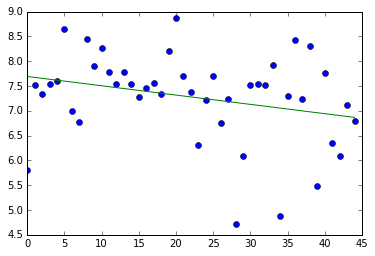

In [47]:
# Plot Verbs per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Verbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

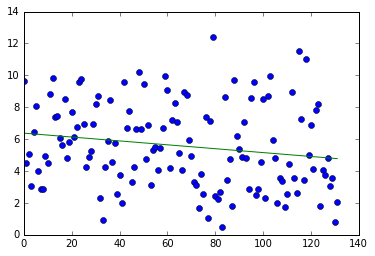

In [48]:
# Plot Verbs per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Verbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

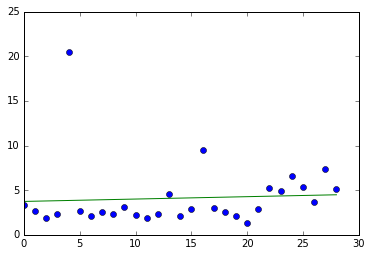

In [49]:
# Plot Verbs per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Verbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

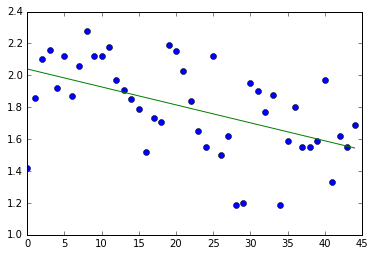

In [50]:
# Plot Adjectives per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Adjectives/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

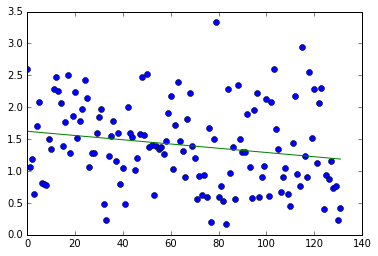

In [51]:
# Plot Adjectives per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Adjectives/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

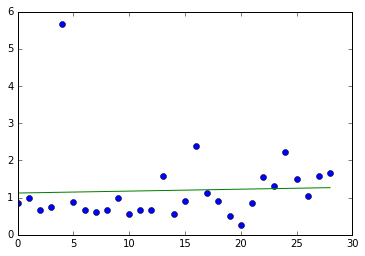

In [52]:
# Plot Adjectives per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Adjectives/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

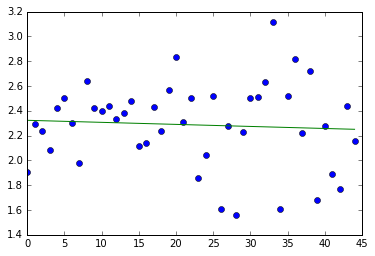

In [53]:
# Plot Adverbs per 100 over time for RR
xs = dfRR['index']
ys = dfRR['Adverbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

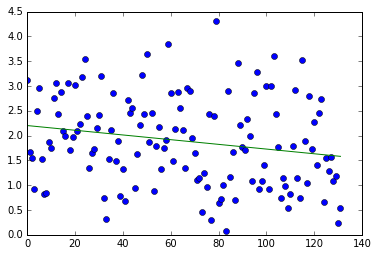

In [54]:
# Plot Adverbs per 100 over time for GHWB
xs = dfGWHB['index']
ys = dfGWHB['Adverbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

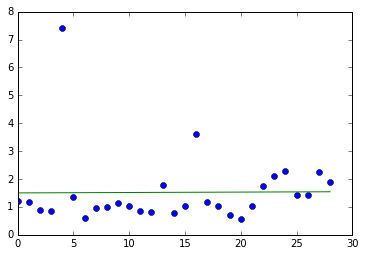

In [55]:
# Plot Adverbs per 100 over time for DJT
xs = dfDJT['index']
ys = dfDJT['Adverbs/100']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

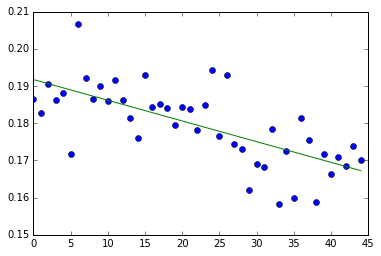

In [56]:
xs = dfRR['index']
ys = dfRR['NounsNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

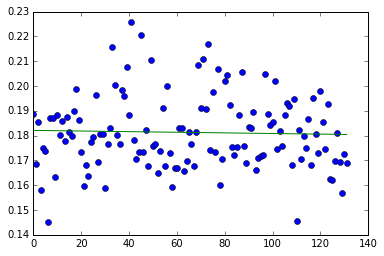

In [57]:
xs = dfGWHB['index']
ys = dfGWHB['NounsNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

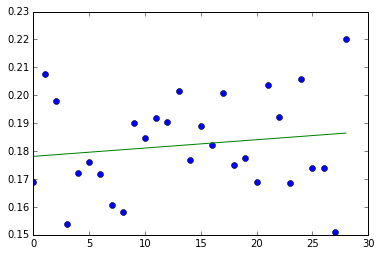

In [58]:
xs = dfDJT['index']
ys = dfDJT['NounsNormalised']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

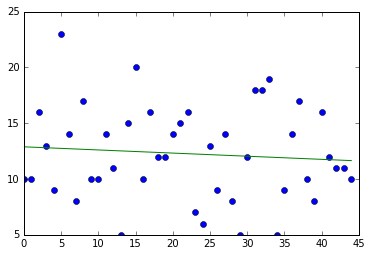

In [59]:
xs = dfRR['index']
ys = dfRR['Fillers']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

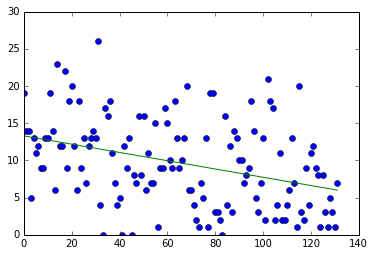

In [60]:
xs = dfGWHB['index']
ys = dfGWHB['Fillers']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

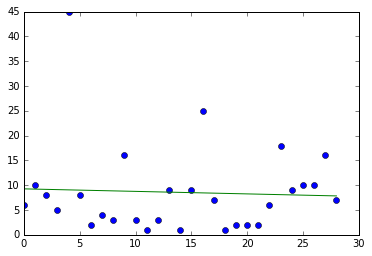

In [61]:
xs = dfDJT['index']
ys = dfDJT['Fillers']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

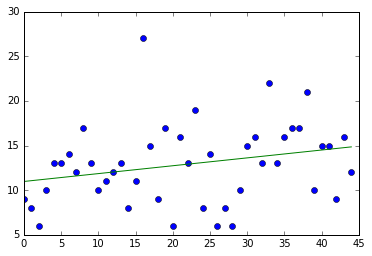

In [62]:
xs = dfRR['index']
ys = dfRR['NSNouns']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

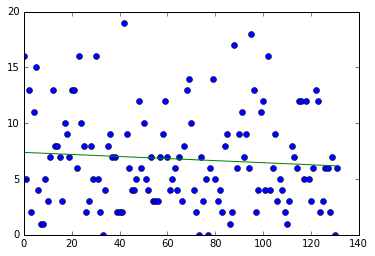

In [63]:
xs = dfGWHB['index']
ys = dfGWHB['NSNouns']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

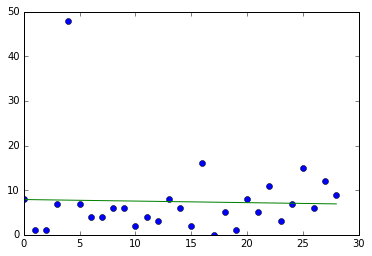

In [64]:
xs = dfDJT['index']
ys = dfDJT['NSNouns']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

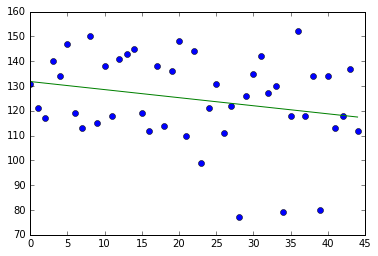

In [65]:
xs = dfRR['index']
ys = dfRR['LIVerbs']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

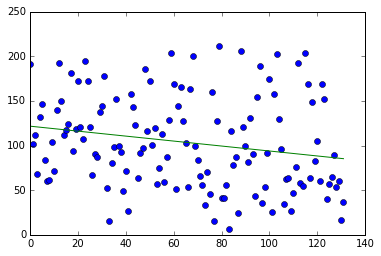

In [66]:
xs = dfGWHB['index']
ys = dfGWHB['LIVerbs']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

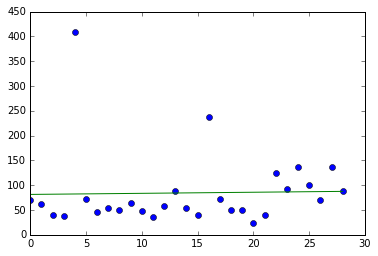

In [67]:
xs = dfDJT['index']
ys = dfDJT['LIVerbs']
xs = np.asarray(xs)
trend = np.polyfit(xs, ys, 1) # fit a straight line
plt.plot(xs, ys,'o')
plt.plot(xs,trend[1]+trend[0]*xs)

In [68]:
labelsRR = dfRR['Filename']
dfRR = dfRR.drop(['Filename', 'JDate', 'Julian', 'Date', 'index'], axis=1)
labelsGHWB = dfGWHB['Filename']
dfGWHB = dfGWHB.drop(['Filename', 'JDate', 'Julian', 'Date', 'index'], axis=1)
labelsDJT = dfDJT['Filename']
dfDJT = dfDJT.drop(['Filename', 'JDate', 'Julian', 'Date', 'index'], axis=1)

In [69]:
# Scale the data
yRRscaled = preprocessing.scale(yRR)
dfRRscaled = preprocessing.scale(dfRR)

yGWHBscaled = preprocessing.scale(yGWHB)
dfGWHBscaled = preprocessing.scale(dfGWHB)

yDJTscaled = preprocessing.scale(yDJT)
dfDJTscaled = preprocessing.scale(dfDJT)

/home/CAMPUS/alcantaj/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/CAMPUS/alcantaj/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/CAMPUS/alcantaj/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


-- LINEAR REGRESSION --

In [70]:
resultsGridRR = pd.DataFrame()
for i in range (1,1000):
    X_train, X_test, y_train, y_test = train_test_split(dfRRscaled, yRR, test_size=0.20)
    # fit a model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(predictions, y_test)
    resultsTuple = {'Slope': slope, 'intercept': intercept, 'r_value': r_value,
                    'p_value':p_value, 
                    'std_err':std_err}
    resultsGridRR = resultsGridRR.append(resultsTuple, ignore_index=True)
    

In [71]:
resultsGridGWHB = pd.DataFrame()
for i in range (1,1000):
    X_train, X_test, y_train, y_test = train_test_split(dfGWHBscaled, yGWHB, test_size=0.20)
    # fit a model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(predictions, y_test)
    resultsTuple = {'Slope': slope, 'intercept': intercept, 'r_value': r_value,
                    'p_value':p_value, 
                    'std_err':std_err}
    resultsGridGWHB = resultsGridGWHB.append(resultsTuple, ignore_index=True)

In [72]:
resultsGridDJT = pd.DataFrame()
for i in range (1,1000):
    X_train, X_test, y_train, y_test = train_test_split(dfDJTscaled, yDJT, test_size=0.20)
    # fit a model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(predictions, y_test)
    resultsTuple = {'Slope': slope, 'intercept': intercept, 'r_value': r_value,
                    'p_value':p_value, 
                    'std_err':std_err}
    resultsGridDJT = resultsGridDJT.append(resultsTuple, ignore_index=True)

In [73]:
resultsGridRR.describe()

,Slope,intercept,p_value,r_value,std_err
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.444913,12.321459,0.169618,0.561130,0.243390
std,0.236870,6.322432,0.217787,0.234722,0.103583
min,-1.397990,-25.667481,0.000170,-0.640119,0.072790
25%,0.320390,9.140647,0.028789,0.456837,0.172952
50%,0.452588,12.449773,0.077085,0.616012,0.218820
75%,0.570963,16.274632,0.211782,0.719763,0.289968
max,1.729776,40.819671,0.979087,0.939415,0.801521


In [74]:
resultsGridGWHB.describe()

,Slope,intercept,p_value,r_value,std_err
count,999.000000,999.000000,9.990000e+02,999.000000,999.000000
mean,0.504676,31.500343,1.970617e-02,0.554751,0.150498
std,0.144254,11.295933,6.266537e-02,0.124119,0.035719
min,0.021867,-4.591971,8.771445e-08,0.026812,0.060410
25%,0.404795,24.566918,3.005415e-04,0.482782,0.123607
50%,0.491776,31.750458,1.950024e-03,0.569073,0.146852
75%,0.600717,39.144870,1.075245e-02,0.642663,0.174023
max,1.017060,64.085756,8.943898e-01,0.829685,0.269784


In [75]:
resultsGridDJT.describe()

,Slope,intercept,p_value,r_value,std_err
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.172964,10.939517,0.423867,0.235387,0.363425
std,0.429395,6.680889,0.277325,0.438921,0.236110
min,-2.341185,-27.753886,0.003652,-0.950240,0.061777
25%,-0.058342,7.228889,0.184742,-0.103020,0.200695
50%,0.235765,11.240043,0.385819,0.333003,0.300160
75%,0.401101,14.763709,0.635735,0.583282,0.462283
max,1.967514,36.323495,0.999814,0.944718,1.678821


-- GAUSSIAN PROCESSES --

In [93]:
path = '/home/CAMPUS/alcantaj/Dropbox/'
bush_df = pd.read_csv(path + 'Bush.csv')
reagan_df = pd.read_csv(path + 'Reagan.csv')

In [94]:
minimum = reagan_df['Julian'].min() # Smallest Julian Date
maximum = reagan_df['Julian'].max() # Maximum Julian Date

In [95]:
reagan_df['NormalisedDate'] = (reagan_df['Julian'] - minimum) / (maximum - minimum) 

In [96]:
reagan_df['CountDays'] = reagan_df['Julian'] - minimum

In [97]:
reagan_df['CountDaysN'] = reagan_df['CountDays'] / 365

In [98]:
# NEED TO DROP DATA COLUMNS HERE BEFORE RUN MODEL
reagan_df = reagan_df.drop(['Unnamed: 0', 'Filename', 'index','Date', 'JDate', 'Julian',
                           'NormalisedDate', 'CountDays'], axis=1)

In [99]:
target = reagan_df['CountDaysN']

In [100]:
max_target = target.max()

In [101]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(185, (1e-2, 1e4))
# kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=15)

In [102]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(reagan_df, target, test_size=0.20)

In [103]:
target = np.asarray(y_train)
variables = np.asarray(X_train)

In [104]:
# Fit to data using Maximum Likelihood Estimation of the parameters
model = gp.fit(variables, target) # This looks fine according to documentation

In [105]:
y_pred, sigma = gp.predict(np.asarray(X_test), return_std=True)

<ErrorbarContainer object of 3 artists>

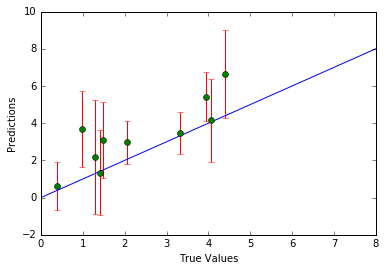

In [106]:
# The plot
plt.figure()
xs = [x for x in range(0, 9)]
ys = [x for x in range(0, 9)]
plt.plot(xs, ys)
plt.plot(y_test, y_pred, 'o', linestyle='None')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis(xscale = 0, yscale = 0)
plt.errorbar(y_test, y_pred, yerr=sigma, elinewidth=1, fillstyle='full', linestyle ='None')

In [107]:
sqErr = (y_test - y_pred)**2

In [108]:
df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'sigma': sigma, 'Squared Error': sqErr})

In [109]:
df

,y_test,y_pred,sigma,Squared Error
11,1.493151,3.102115,2.027346,2.588765
23,3.312329,3.467768,1.132148,0.024161
27,4.065753,4.147050,2.254239,0.006609
9,1.284932,2.185391,3.071363,0.810827
15,2.049315,2.980182,1.155278,0.866514
30,4.386301,6.659624,2.354701,5.167996
26,3.947945,5.429175,1.302283,2.194041
10,1.416438,1.341820,2.284694,0.005568
2,0.378082,0.621327,1.312905,0.059168
6,0.972603,3.682230,2.055530,7.342082


In [110]:
MSE = sum(sqErr) / len(sqErr)

In [111]:
MSE

1.9065731095694178

In [112]:
bush_df = pd.read_csv(path + 'Bush.csv')
reagan_df = pd.read_csv(path + 'Reagan.csv')

In [113]:
minimum = reagan_df['Julian'].min() # Smallest Julian Date
maximum = reagan_df['Julian'].max() # Maximum Julian Date

In [114]:
reagan_df['NormalisedDate'] = (reagan_df['Julian'] - minimum) / (maximum - minimum) 

In [115]:
reagan_df['CountDays'] = reagan_df['Julian'] - minimum

In [116]:
reagan_df['CountDaysN'] = reagan_df['CountDays'] / 365

In [117]:
# NEED TO DROP DATA COLUMNS HERE BEFORE RUN MODEL
reagan_df = reagan_df.drop(['Unnamed: 0', 'Filename', 'index','Date', 'JDate', 'Julian',
                           'NormalisedDate', 'CountDays'], axis=1)

In [118]:
target = reagan_df['CountDaysN']

In [119]:
max_target = target.max()

In [120]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(191, (1e-2, 1e4))
# kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=15)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(reagan_df, target, test_size=0.20)

In [122]:
Results = pd.DataFrame()
for i in range(0, 999):
    X_train, X_test, y_train, y_test = train_test_split(reagan_df, target, test_size=0.20)
    targetVar = np.asarray(y_train)
    variables = np.asarray(X_train)
    model = gp.fit(variables, targetVar)
    y_pred, sigma = gp.predict(np.asarray(X_test), return_std=True)
    sqErr = (y_test - y_pred)**2
    MSE = sum(sqErr)/len(sqErr)
    tuple = {'MSE': MSE, 'gp.kernel':gp.kernel, 'gp.kernel_':gp.kernel_}
    Results = Results.append(tuple, ignore_index = True)

In [123]:
Mean = Results['MSE'].mean()
SD = Results['MSE'].std()

In [124]:
print('The Mean is', Mean)
print('The SD is', SD)

The Mean is 5.1395666750183455
The SD is 3.9062742053964143


In [125]:
Results

,MSE,gp.kernel,gp.kernel_
0,2.348757,1**2 * RBF(length_scale=191),4.2**2 * RBF(length_scale=195)
1,4.807252,1**2 * RBF(length_scale=191),4.37**2 * RBF(length_scale=188)
2,8.883994,1**2 * RBF(length_scale=191),3.86**2 * RBF(length_scale=192)
3,1.943527,1**2 * RBF(length_scale=191),4.77**2 * RBF(length_scale=203)
4,1.824610,1**2 * RBF(length_scale=191),4.08**2 * RBF(length_scale=174)
5,3.842889,1**2 * RBF(length_scale=191),4.04**2 * RBF(length_scale=185)
6,4.299470,1**2 * RBF(length_scale=191),4.25**2 * RBF(length_scale=200)
7,4.042687,1**2 * RBF(length_scale=191),31.6**2 * RBF(length_scale=1.3e+03)
8,2.689878,1**2 * RBF(length_scale=191),4.3**2 * RBF(length_scale=194)
9,4.031544,1**2 * RBF(length_scale=191),4.8**2 * RBF(length_scale=228)
